# 17 FOXN1^LacZ

## Notebook setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import scanpy.external as sce
import numpy as np
import pandas as pd
import warnings, scipy.sparse as sp, matplotlib, matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import rc_context
from collections import Counter
import matplotlib.font_manager
import pyreadr
import rpy2
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
#import magic
#import seaborn as sns
import palantir
import loompy
#from scipy.sparse import csgraph

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rc('font', size=14)

pd.set_option('display.max_rows', 200)

sc.set_figure_params(dpi=80, dpi_save=300, color_map='Spectral_r', vector_friendly=True, transparent=True)
sc.settings.verbosity = 0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.2 scipy==1.5.3 pandas==1.4.4 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [2]:
# preset color palettes and color maps
user_defined_palette =  [ '#F6222E', '#16FF32', '#3283FE', '#FEAF16', '#BDCDFF', '#3B00FB', '#1CFFCE', '#C075A6', '#F8A19F', '#B5EFB5', '#FBE426', '#C4451C', 
                          '#2ED9FF', '#c1c119', '#8b0000', '#FE00FA', '#1CBE4F', '#1C8356', '#0e452b', '#AA0DFE', '#B5EFB5', '#325A9B', '#90AD1C']

user_defined_cmap_markers = LinearSegmentedColormap.from_list('mycmap', ["#E6E6FF", "#CCCCFF", "#B2B2FF", "#9999FF",  "#6666FF",   "#3333FF", "#0000FF"])
user_defined_cmap_degs = LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#3333FF", "#6666FF", "#9999FF", "#B2B2FF", "#CCCCFF", "#E6E6FF", "#E6FFE6", "#CCFFCC", "#B2FFB2", "#99FF99", "#66FF66", "#33FF33", "#00FF00"])

In [3]:
%matplotlib inline 

In [4]:
def observe_variance(anndata_object):
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    # variance per principal component
    x = range(len(anndata_object.uns['pca']['variance_ratio']))
    y = anndata_object.uns['pca']['variance_ratio']
    ax1.scatter(x,y,s=4)
    ax1.set_xlabel('PC')
    ax1.set_ylabel('Fraction of variance explained\n')
    ax1.set_title('Fraction of variance explained per PC\n')
    # cumulative variance explained
    cml_var_explained = np.cumsum(anndata_object.uns['pca']['variance_ratio'])
    x = range(len(anndata_object.uns['pca']['variance_ratio']))
    y = cml_var_explained
    ax2.scatter(x,y,s=4)
    ax2.set_xlabel('PC')
    ax2.set_ylabel('Cumulative fraction of variance\nexplained')
    ax2.set_title('Cumulative fraction of variance\nexplained by PCs')
    fig.tight_layout()
    plot = plt.show
    return(plot)

In [5]:
path_to_h5ad = '../output/anndata_io/Fig1af.h5ad'

In [6]:
adata_d0 = sc.read_h5ad(path_to_h5ad)
adata_d0.uns['log1p']["base"] = None

In [7]:
path_to_h5ad = '../output/anndata_io/Foxn1tdTom.h5ad'

In [8]:
Foxn1Lin = sc.read_h5ad(path_to_h5ad)
Foxn1Lin.uns['log1p']["base"] = None

In [9]:
path_to_h5ad = '../output/anndata_io/Foxn1LacZ.h5ad'

In [10]:
Foxn1LacZ = sc.read_h5ad(path_to_h5ad)
Foxn1LacZ.uns['log1p']["base"] = None

In [11]:
with_Foxn1LacZ_and_Foxn1Lin = sc.concat(
    [adata_d0, Foxn1Lin, Foxn1LacZ], # add more annadata objects here separated by commas
    join='outer', 
    label = 'dataset', 
    keys = ['ours','Foxn1-lin', 'Foxn1-lacZ'], # or use your sample_names list (as used above) here. 
    # Make sure the order of the batch categories matches that of the AnnData objects 
    index_unique = '@'
)

In [12]:
with_Foxn1LacZ_and_Foxn1Lin.obs['genotype'] = ['Foxn1-lacZ mt' if 'Foxn1_lacZ' in x else 'Foxn1-lacZ mock' if 'Foxn1_wt' in x else 
                                              'Foxn1-cre' if 'Foxn1cre' in x else 'wild type' for x in with_Foxn1LacZ_and_Foxn1Lin.obs['sample']]

In [13]:
with_Foxn1LacZ_and_Foxn1Lin.uns['genotype_colors']=user_defined_palette

In [14]:
with_Foxn1LacZ_and_Foxn1Lin.obs['stage'] = ['02mo' if 'mo02' in x else '06mo' if 'mo06' in x else '18mo' for x in with_Foxn1LacZ_and_Foxn1Lin.obs['sample']]

In [15]:
with_Foxn1LacZ_and_Foxn1Lin.uns['stage_colors']= ['#76D6FF', '#FF8072', '#FF8072']

In [16]:
with_Foxn1LacZ_and_Foxn1Lin.obs['sex'] = ['male' if '_m' in x else 'female' for x in with_Foxn1LacZ_and_Foxn1Lin.obs['sample']]

In [17]:
with_Foxn1LacZ_and_Foxn1Lin.uns['sex_colors'] = [  '#FBE426', '#C4451C']

In [18]:
with_Foxn1LacZ_and_Foxn1Lin.uns['cell_type_colors'] = ['#d62728','#19c9b3', '#FFA5D2', '#ff7f0e','#199919', '#aa40fc']

In [19]:
with_Foxn1LacZ_and_Foxn1Lin.uns['cell_type_subset_colors'] = ['#F6222E', '#3283FE', '#16FF32',  '#BDCDFF', '#AA0DFE','#1CFFCE', '#d62728', '#19c9b3','#FFA5D2',   'grey', '#2ED9FF', '#c1c119', '#8b0000', '#3B00FB', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5', '#BEFFF7','#FEAF16', '#325A9B', '#C075A6', 'black']

In [20]:
sc.pp.highly_variable_genes(with_Foxn1LacZ_and_Foxn1Lin, n_top_genes=3500, n_bins=20, flavor='seurat',  inplace=True)

In [21]:
rng = np.random.RandomState(42)
sc.tl.pca(with_Foxn1LacZ_and_Foxn1Lin, n_comps=200, svd_solver='arpack', random_state=rng)

<function matplotlib.pyplot.show(close=None, block=None)>

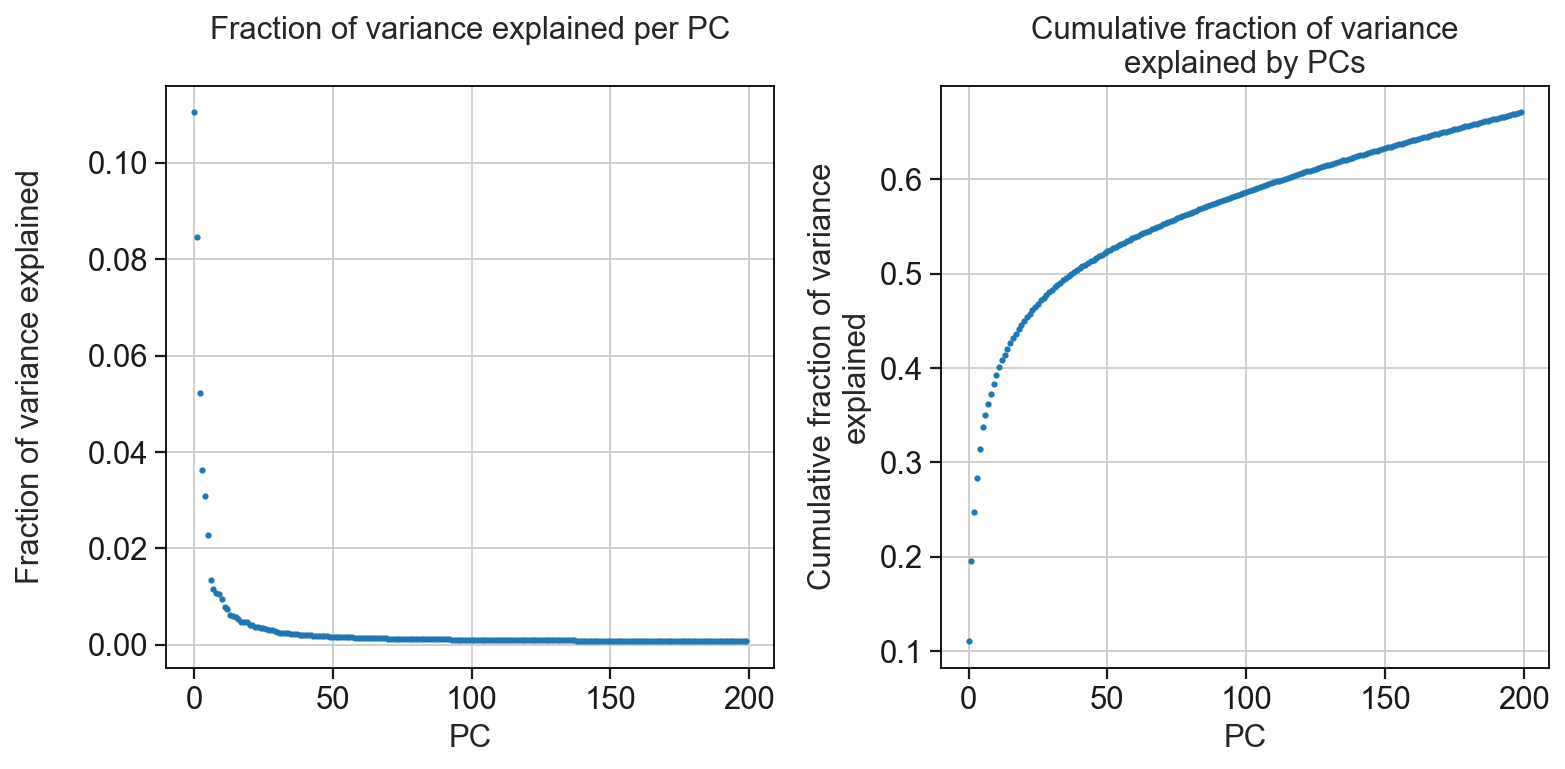

In [22]:
observe_variance(with_Foxn1LacZ_and_Foxn1Lin)

In [23]:
rng = np.random.RandomState(42)
sc.tl.pca(with_Foxn1LacZ_and_Foxn1Lin, n_comps=55, svd_solver='arpack', random_state=rng)

### Integrating data using harmony

In [24]:
sce.pp.harmony_integrate(with_Foxn1LacZ_and_Foxn1Lin, 'sample')

2024-04-16 17:09:27,948 - harmonypy - INFO - Iteration 1 of 10
2024-04-16 17:09:37,600 - harmonypy - INFO - Iteration 2 of 10
2024-04-16 17:09:47,270 - harmonypy - INFO - Iteration 3 of 10
2024-04-16 17:09:56,593 - harmonypy - INFO - Iteration 4 of 10
2024-04-16 17:10:06,072 - harmonypy - INFO - Iteration 5 of 10
2024-04-16 17:10:12,186 - harmonypy - INFO - Converged after 5 iterations


In [25]:
sc.pp.neighbors(with_Foxn1LacZ_and_Foxn1Lin, n_neighbors=15, use_rep='X_pca_harmony')
sc.tl.umap(with_Foxn1LacZ_and_Foxn1Lin)

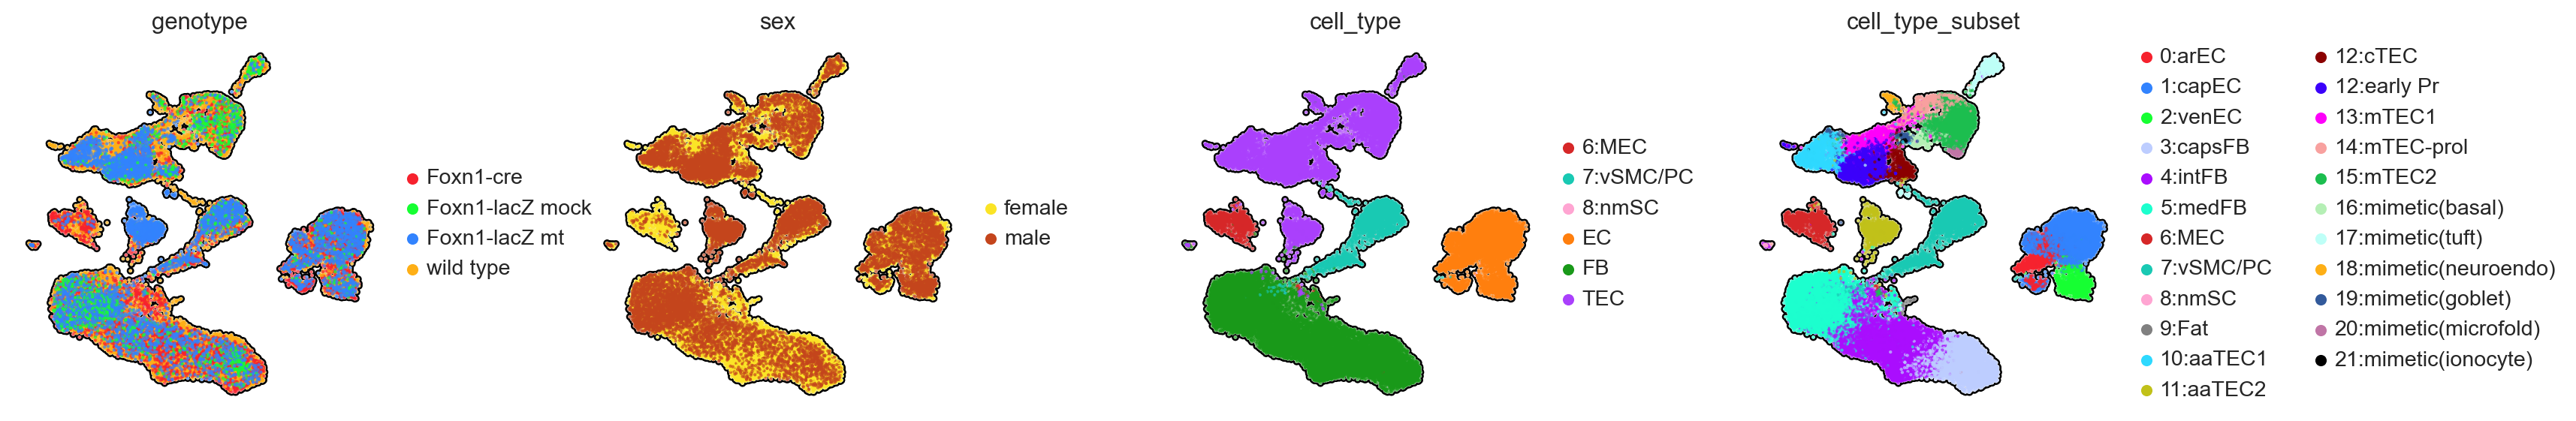

In [26]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=True, transparent=True)

sc.pl.umap(
    with_Foxn1LacZ_and_Foxn1Lin, 
    color=['genotype', 'sex', 'cell_type', 'cell_type_subset'], 
    color_map='Spectral_r',
    use_raw=False, 
    ncols=5, 
    wspace = 0.4,
    outline_width=[0.6, 0.05], 
    size=15,
    frameon=False, 
    add_outline=True, 
    sort_order = False)

## Isolate TEC_d0 + lacZ

In [27]:
TEC_with_Foxn1LacZ_and_Foxn1Lin = with_Foxn1LacZ_and_Foxn1Lin[(with_Foxn1LacZ_and_Foxn1Lin.obs['cell_type']=='TEC') & (with_Foxn1LacZ_and_Foxn1Lin.obs['cell_type']!='8:nmSC') & (with_Foxn1LacZ_and_Foxn1Lin.obs['cell_type_subset']!='8:nmSC')]

In [28]:
rng = np.random.RandomState(42)
sc.tl.pca(TEC_with_Foxn1LacZ_and_Foxn1Lin, n_comps=55, svd_solver='arpack', random_state=rng)

### Integrating data using harmony

In [29]:
sce.pp.harmony_integrate(with_Foxn1LacZ_and_Foxn1Lin, 'sample')

2024-04-16 17:12:23,415 - harmonypy - INFO - Iteration 1 of 10
2024-04-16 17:12:32,810 - harmonypy - INFO - Iteration 2 of 10
2024-04-16 17:12:41,943 - harmonypy - INFO - Iteration 3 of 10
2024-04-16 17:12:51,385 - harmonypy - INFO - Iteration 4 of 10
2024-04-16 17:13:01,032 - harmonypy - INFO - Iteration 5 of 10
2024-04-16 17:13:07,135 - harmonypy - INFO - Converged after 5 iterations


In [30]:
sc.pp.neighbors(with_Foxn1LacZ_and_Foxn1Lin, n_neighbors=15, use_rep='X_pca_harmony')
sc.tl.umap(with_Foxn1LacZ_and_Foxn1Lin)

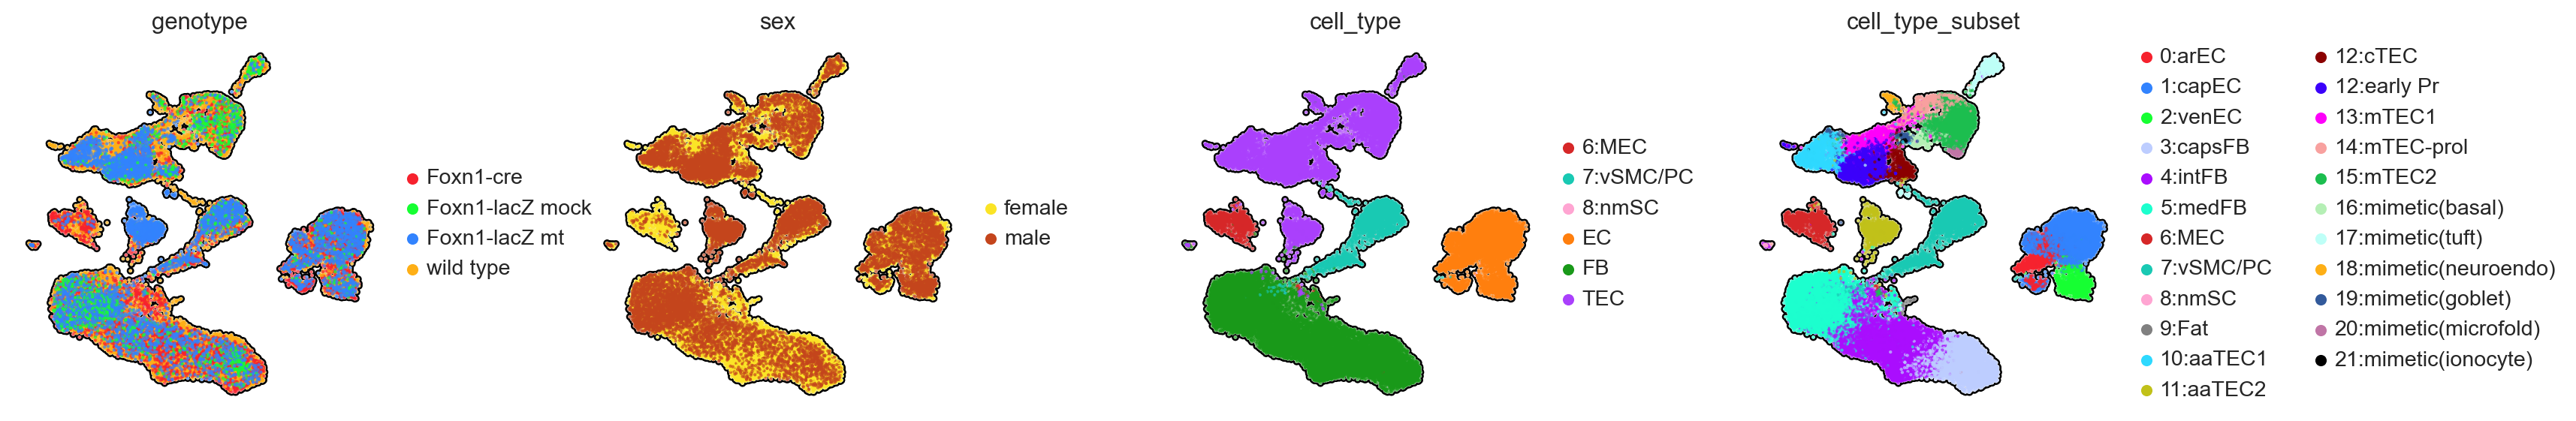

In [31]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=True, transparent=True)

# PC 75
sc.pl.umap(
    with_Foxn1LacZ_and_Foxn1Lin, 
    color=['genotype', 'sex', 'cell_type', 'cell_type_subset'], 
    color_map='Spectral_r',
    use_raw=False, 
    ncols=5, 
    wspace = 0.4,
    outline_width=[0.6, 0.05], 
    size=15,
    frameon=False, 
    add_outline=True, 
    sort_order = False)

In [32]:
TEC_with_Foxn1LacZ_and_Foxn1Lin.obs['distinct'] = ''
TEC_with_Foxn1LacZ_and_Foxn1Lin.obs['distinct'] = TEC_with_Foxn1LacZ_and_Foxn1Lin.obs[['stage', 'genotype']].agg(' '.join, axis=1)

In [33]:
crosstb = pd.crosstab(TEC_with_Foxn1LacZ_and_Foxn1Lin.obs['distinct'], TEC_with_Foxn1LacZ_and_Foxn1Lin.obs['cell_type_subset'], normalize='index')

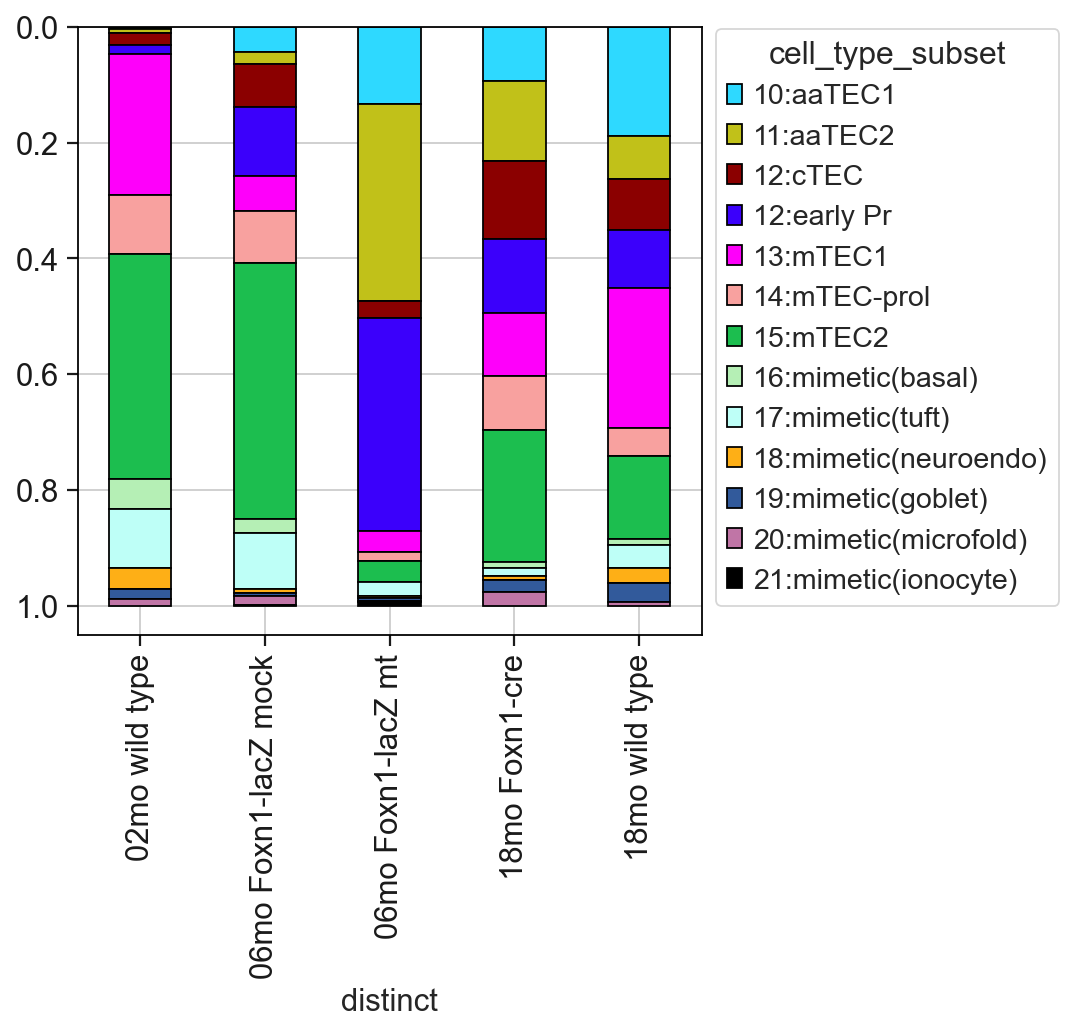

In [34]:
plt.rcParams['figure.figsize'] = [5, 5]

ax = crosstb.plot(kind='bar', stacked=True, edgecolor = "black", color=TEC_with_Foxn1LacZ_and_Foxn1Lin.uns['cell_type_subset_colors'])
ax.invert_yaxis()
ax.legend(title='cell_type_subset', bbox_to_anchor=(1, 1.02), loc='upper left')

In [35]:
TEC_with_Foxn1LacZ_and_Foxn1Lin.obs['distinct'] = ''
TEC_with_Foxn1LacZ_and_Foxn1Lin.obs['distinct'] = TEC_with_Foxn1LacZ_and_Foxn1Lin.obs[['stage', 'genotype', 'sex']].agg(' '.join, axis=1)

In [36]:
crosstb = pd.crosstab(TEC_with_Foxn1LacZ_and_Foxn1Lin.obs['distinct'], TEC_with_Foxn1LacZ_and_Foxn1Lin.obs['cell_type_subset'], normalize='index')

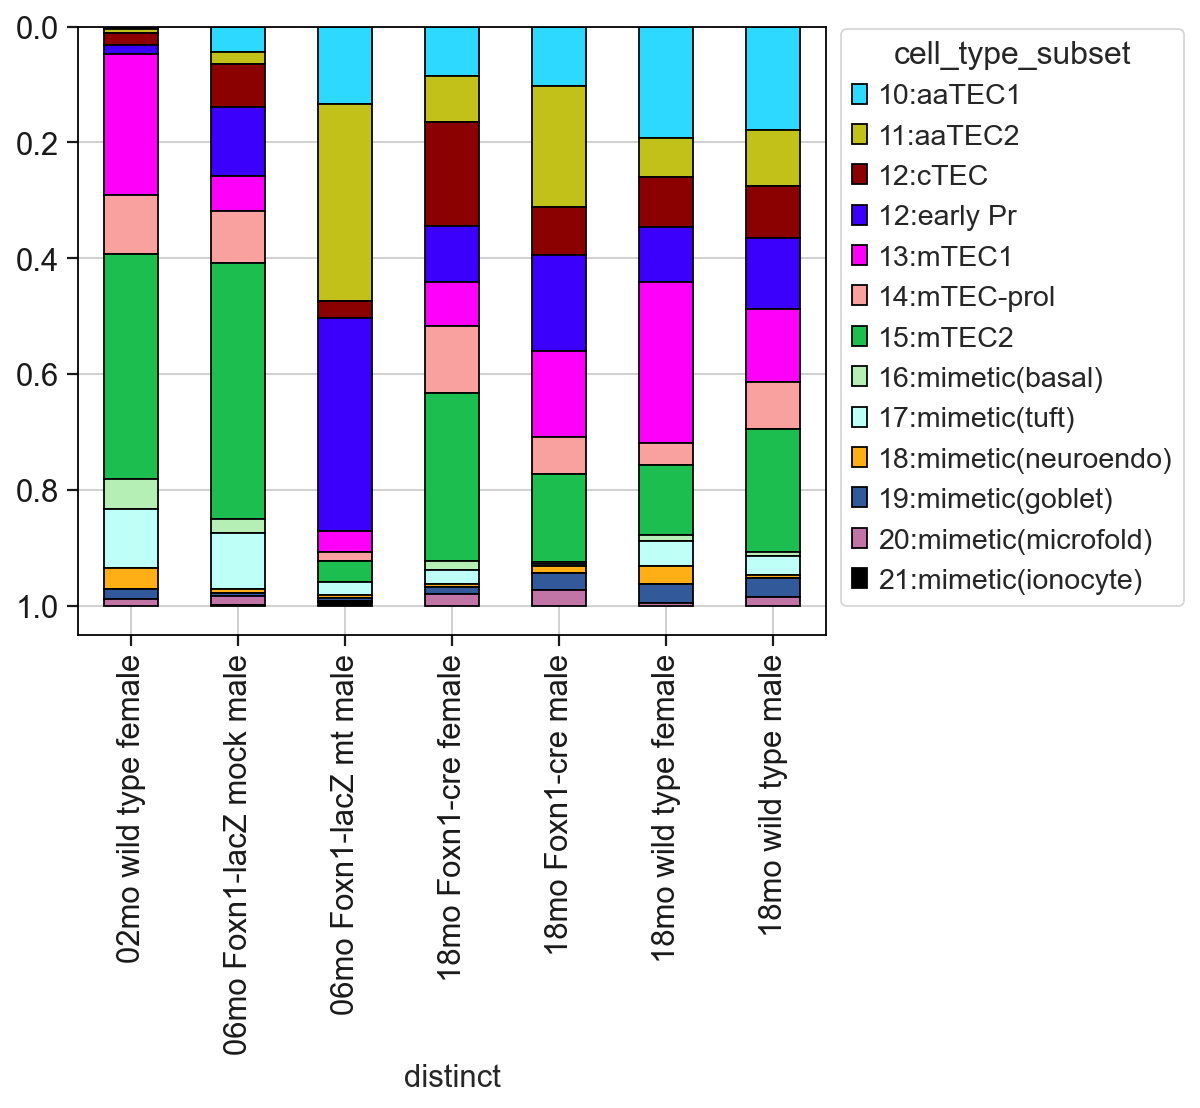

In [37]:
plt.rcParams['figure.figsize'] = [6, 5]

ax = crosstb.plot(kind='bar', stacked=True, edgecolor = "black", color=TEC_with_Foxn1LacZ_and_Foxn1Lin.uns['cell_type_subset_colors'])
ax.invert_yaxis()
ax.legend(title='cell_type_subset', bbox_to_anchor=(1, 1.02), loc='upper left')